# Coursework 1: Convolutional Neural Networks
### Autograding
Part 1 of this coursework is autograded. This notebook comes with embedded tests which will verify that your implementations provide outputs with the appropriate types and shapes required for our hidden tests. You can run these same public tests through [LabTS](https://teaching.doc.ic.ac.uk/labts) when you have finished your work, to check that we get the same results when running these public tests.

Hidden tests will be ran after the submission deadline, and cannot be accessed :)

### Setting up working environment

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory or Lab cluster, where you can access GPUs.

Please refer to the Intro lecture for getting set up on the various GPU options.

**To run the public tests within colab** you will need to copy the "tests" folder to the /content/ directory (this is the default working directory - you can also change directories with %cd). You may also need to place a copy of the CW ipynb in the /content/ directory. A better option is to mount colab on gdrive and keep the files there (so you only need to do the set up once).

#### Setup
You will need to install pytorch and other libraries by running the following cell:

<font color="orange">**The deadline for submission is Tuesday, 6 Feb by 6 pm** </font>

In [1]:
!pip install -q otter-grader pandoc torch torchvision scikit-learn seaborn scikit-optimize

In [61]:
print("Content Path:", content_path)
print("Google Drive Contents:")
!ls /content/drive/MyDrive/DL_CW_1_ajh23
!ls /content/drive/MyDrive/dl_cw_1_ajh23

Content Path: /content/drive/MyDrive/DL_CW_1_ajh23/
Google Drive Contents:
dl_cw_1.ipynb  tests
ls: cannot access '/content/drive/MyDrive/dl_cw_1_ajh23': No such file or directory


In [5]:
# Initialization Cell
try:
    WORKING_ENV = 'COLAB' # Can be LABS, COLAB, PAPERSPACE, SAGEMAKER
    USERNAME = 'ajh23' # If working on Lab Machines - Your college username
    assert WORKING_ENV in ['LABS', 'COLAB', 'PAPERSPACE', 'SAGEMAKER']

    if WORKING_ENV == 'COLAB':
        from google.colab import drive
        %load_ext google.colab.data_table
        d1_cw1_repo_path = 'DL_CW_1_ajh23/' # path in your gdrive to the repo
        content_path = f'/content/drive/MyDrive/{d1_cw1_repo_path}' # path to gitrepo in gdrive after mounting
        drive.mount('/content/drive/') # Outputs will be saved in your google drive

    elif WORKING_ENV == 'LABS':
        content_path = f'/vol/bitbucket/{USERNAME}/dl/dl_cw1/' # You may want to change this
        # Your python env and training data should be on bitbucket
        if 'vol' not in content_path:
            import warnings
            warnings.warn(
                'It is best to create a dir in /vol/bitbucket/ otherwise you will quickly run into memory issues'
            )

    elif WORKING_ENV == 'PAPERSPACE': # Using Paperspace
        # Paperspace does not properly render animated progress bars
        # Strongly recommend using the JupyterLab UI instead of theirs
        !pip install ipywidgets
        content_path = '/notebooks'

    elif WORKING_ENV == 'SAGEMAKER':
        content_path = '/home/studio-lab-user/sagemaker-studiolab-notebooks/'
    else:
        raise NotImplementedError()

    import otter
    import os
    print(f'{content_path}')
    if not os.path.exists(f'{content_path}tests'):
        raise ValueError('Cannot find the public tests folder')

    grader = otter.Notebook(
        f'{content_path}dl_cw_1.ipynb',
        tests_dir=f'{content_path}tests')

    import matplotlib.pyplot as plt # DO NOT use %matplotlib inline in the notebook
    import numpy as np
    rng_seed = 90
except:
    # This is a fallback initialization for running on LabTS. Please leave this in place before submission.
    import otter
    grader = otter.Notebook("dl_cw_1.ipynb")
    import matplotlib.pyplot as plt
    import numpy as np
    rng_seed = 90


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/DL_CW_1_ajh23/


ValueError: Tests directory ./tests does not exist

## Introduction
In this courswork you will explore various deep learning functionalities through implementing a number of pytorch neural network operations/layers and creating your own deep learning model and methodology for a high dimensional classification problem.

#### Intended learning outcomes
- An understanding of the mechanics behind convolutional, pooling, linear and batch norm operations.
- Be able to implement convolution, pooling, linear and batch norm layers from basic building blocks.
- Experience designing, implementing and optimising a classifier for a high dimensional dataset.

## Part 1 (50 points)

In this part, you will use basic Pytorch operations to define the 2D convolution, 2D max pooling, linear layer, as well as 2D batch normalization operations. Being computer scientists we care about efficiency, we therefore do not want to see any _for loops_!

**Your Task**
- Implement the forward pass for Conv2D (15 points), MaxPool2D (15 points), Linear (5 points) and BatchNorm2d (15 points)
- You are **NOT** allowed to use the torch.nn modules (The one exception is that the class inherits from nn.Module)

_hint: check out F.unfold and F.fold, they may be helpful_

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height H' and width W'.

        Parameters:
        - w: Filter weights of shape (F, C, H', W',)
        - b: Biases of shape (F,)
        - kernel_size: Union[int, (int, int)], Size of the convolving kernel
        - stride: Union[int, (int, int)], Number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: Union[int, (int, int)], Number of pixels that will be used to zero-pad the input.
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Define the parameters used in the forward pass
        ...
        # Weights should have shape [out_channels, in_channels, kernel_x, kernel_y]
        self.w = torch.zeros(out_channels, in_channels, kernel_size[0], kernel_size[1])
        # Bias should have shape [out_channels]
        if bias:
            self.b = torch.zeros(out_channels)
        else:
            self.b = None  # No bias
        self.F = out_channels
        self.C = in_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)****
        # TODO: Implement the forward pass
        H_ = (x[0] + 2*self.padding[0] - self.kernel_size[0]) / self.stride[0] + 1
        W_ = (x[3] + 2*self.padding[1] - self.kernel_size[1]) / self.stride[1] + 1
        out = (x[0], self.F, H_, W_)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [44]:
grader.check("Convolution Layer")

NameError: name 'grader' is not defined

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: Union[int, (int, int)], the size of the window to take a max over
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.kernel_size = kernel_size
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        N, C, H, W = x.shape
        if isinstance(self.kernel_size, int):
            kh, kw = self.kernel_size, self.kernel_size
        else:
            kh, kw = self.kernel_size

        # Calculate the output dimensions after max pooling
        H_ = H // kh
        W_ = W // kw

        # Initialize the output tensor with zeros
        out = torch.zeros((N, C, H_, W_), dtype=x.dtype)

        # Iterate over the output dimensions
        for i in range(H_):
            for j in range(W_):
                # Extract a window from the input tensor
                window = x[:, :, i * kh:(i + 1) * kh, j * kw:(j + 1) * kw]
                # Compute the maximum value along the flattened dimension
                out[:, :, i, j] = torch.max(window.view(N, C, -1), dim=2).values

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [ ]:
grader.check("MaxPool Layer")

In [2]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        # Also no initialisation methods for this reason
        self.w = torch.zeros(out_channels, in_channels)
        if bias:
          self.bias = torch.zeros(out_channels)
        else:
          self.bias = None
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        out = x @ self.w + self.bias
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [ ]:
grader.check("Linear Layer")

In [12]:
class BatchNorm2d(nn.Module):
		def __init__(self, num_features, eps=1e-05, momentum=0.1):
			super(BatchNorm2d, self).__init__()
			"""
			An implementation of a Batch Normalization over a mini-batch of 2D inputs.

			The mean and standard-deviation are calculated per-dimension over the
			mini-batches and gamma and beta are learnable parameter vectors of
			size num_features.

			Parameters:
			- num_features: C from an expected input of size (N, C, H, W).
			- eps: a value added to the denominator for numerical stability. Default: 1e-5
			- momentum: the value used for the running_mean and running_var
			computation. Default: 0.1 . (i.e. 1-momentum for running mean)
			- gamma: the learnable weights of shape (num_features).
			- beta: the learnable bias of the module of shape (num_features).
			"""
			# TODO: Define the parameters used in the forward pass                 #
			# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
			self.num_features = num_features
			self.eps = eps
			self.momentum = momentum

			# self.register_parameter is not used as it was mentioned on piazza
			# that this will be overridden
			self.gamma = torch.zeros(num_features)
			self.beta = torch.zeros(num_features)

			# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

		def forward(self, x):
			"""
			During training this layer keeps running estimates of its computed mean and
			variance, which are then used for normalization during evaluation.
			Input:
			- x: Input data of shape (N, C, H, W)
			Output:
			- out: Output data of shape (N, C, H, W) (same shape as input)
			"""
			# TODO: Implement the forward pass                                     #
			#       (be aware of the difference for training and testing)          #
			# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
			mean = x.mean(dim=(0, 2, 3), keepdim=True)
			var = x.var(dim=(0, 2, 3), unbiased=False, keepdim=True)

			# Normalize the input using Batch Normalization formula
			normalized_x = (x - mean) / torch.sqrt(var + self.eps)

			# Scale and shift the normalized input using learnable parameters gamma and beta
			out = self.gamma * normalized_x + self.beta
			# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
			return out

In [ ]:
grader.check("BatchNorm Layer")

## Part 2 (40 points)

In this part, you will design, train and optimise a custom deep learning model for classifying a specially selected subset of Imagenet. Termed NaturalImageNet, it is made up of a hand selected subset of the famous ImageNet dataset. The dataset contains 20 classes, all animals from the natural world. We hope that this dataset will be fun to work with but also a challenge.

You will be marked on your experimental process, methods implemented and your reasoning behind your decisions. While there will be marks for exceeding a baseline performance score we stress that students should **NOT** spend excessive amounts of time optimising performance to silly levels.

We have given you some starter code, please feel free to use and adapt it.

**Your Task**
1. Develop/adapt a deep learning pipeline to maximise performance on the test set. (28 points)
    * 8 points will be awarded for improving on the baseline score on the test set. Don't worry you can get full marks here by improving by a minor amount.
    * 20 points will be awarded for the adaptations made to the baseline model and pipeline.

2. Answer the qualititative questions (12 points)

**Downloading NaturalImageNet**

In [2]:
print("Content Path:", content_path)
print("Google Drive Contents:")
#!ls /content
#!find /content/ -mindepth 1 -maxdepth 1 ! -path '/content/drive/' -exec rm -r {} \;
!ls /content

NameError: name 'content_path' is not defined

In [81]:
from google.colab import files

# Use the following command to upload files
uploaded_files = files.upload()

# Print the names of the uploaded files
for filename in uploaded_files.keys():
    print(f'File uploaded: {filename}')

KeyboardInterrupt: 

In [82]:
ON_COLAB = True

!wget https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
!wget https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
if ON_COLAB:
    !unzip /content/NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip /content/NaturalImageNetTrain.zip?download=1 > /dev/null
else:
    !unzip NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip NaturalImageNetTrain.zip?download=1 > /dev/null

--2024-01-19 11:02:57--  https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/5846979/files/NaturalImageNetTest.zip [following]
--2024-01-19 11:02:57--  https://zenodo.org/records/5846979/files/NaturalImageNetTest.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 138507970 (132M) [application/octet-stream]
NaturalImageNetTest.zip?download=1: Operation not supported

Cannot write to ‘NaturalImageNetTest.zip?download=1’ (Success).
--2024-01-19 11:02:58--  https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:4

In [64]:
#torch
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
#other
import matplotlib.pyplot as plt
import numpy as np
# set the seed for reproducibility
rng_seed = 90
torch.manual_seed(rng_seed)

In [74]:
# When we import the images we want to first convert them to a tensor.
# It is also common in deep learning to normalise the the inputs. This
# helps with stability.
# To read more about this subject this article is a great one:
# https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

# transforms is a useful pytorch package which contains a range of functions
# for preprocessing data, for example applying data augmentation to images
# (random rotations, blurring the image, randomly cropping the image). To find out
# more please refer to the pytorch documentation:
# https://pytorch.org/docs/stable/torchvision/transforms.html

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])
transform = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )
train_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTrain'
test_path = ('/content/' if ON_COLAB else '') +'NaturalImageNetTest'

train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

# Create train val split
n = len(train_dataset)
n_val = int(n/10)

train_set, val_set = torch.utils.data.random_split(train_dataset, [n-n_val, n_val])


print(len(train_set), len(val_set), len(test_dataset))


# The number of images to process in one go. If you run out of GPU
# memory reduce this number!
batch_size = 128

# Dataloaders are a great pytorch functionality for feeding data into our AI models.
# see https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# for more info.

loader_train = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_val = DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

FileNotFoundError: [Errno 2] No such file or directory: 'NaturalImageNetTrain'

In [85]:
unnormalize = transforms.Normalize((-mean / std).tolist(), (1.0 / std).tolist())

def denorm(x):
    '''
    Function to reverse the normalization so that we can visualise the outputs
    '''
    x = unnormalize(x)
    x = x.view(x.size(0), 3, 256, 256)
    return x

def show(img):
    '''
    function to visualise tensors
    '''
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)).clip(0, 1))

**Visualising some example images**

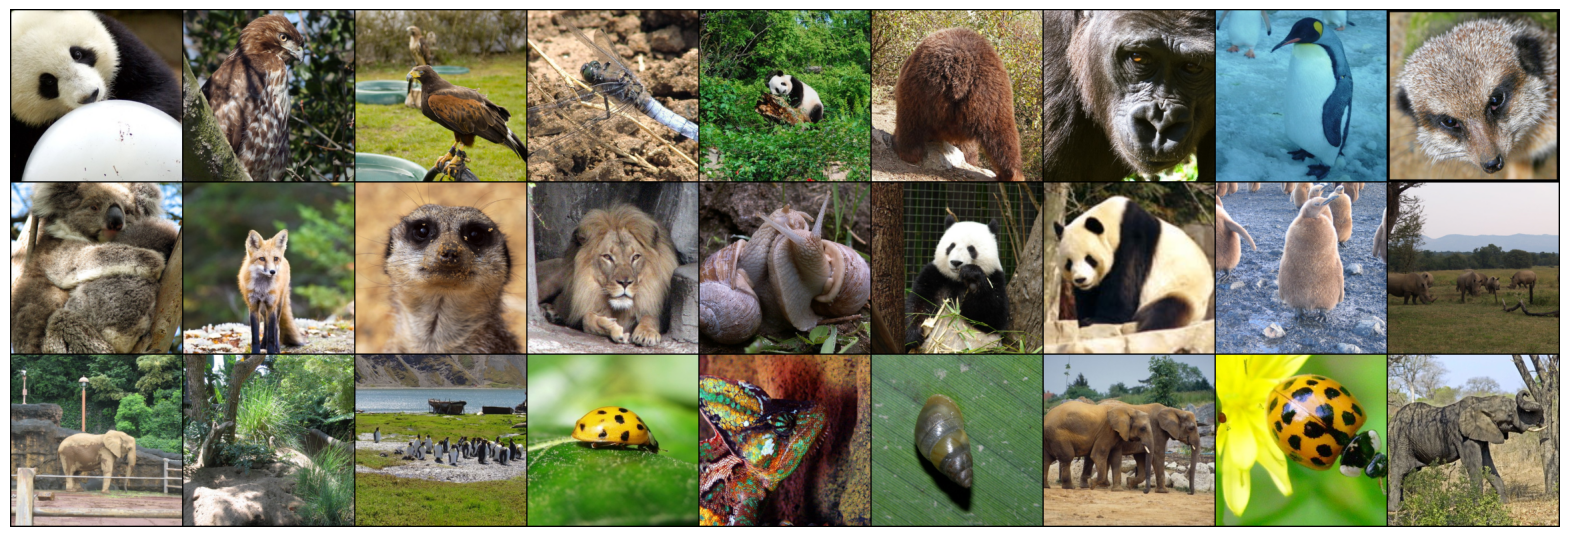

In [19]:
sample_inputs, _ = next(iter(loader_val))
fixed_input = sample_inputs[:27, :, :, :]

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20,10))
plt.axis('off')
show(img)

Next, we define ResNet-18:

In [96]:
# define resnet building blocks

class ResidualBlock(nn.Module):
    def __init__(self, inchannel, outchannel, stride=1):

        super(ResidualBlock, self).__init__()

        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3,
                                         stride=stride, padding=1, bias=False),
                                  nn.BatchNorm2d(outchannel),
                                  nn.ReLU(inplace=True),
                                  Conv2d(outchannel, outchannel, kernel_size=3,
                                         stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(outchannel))

        self.shortcut = nn.Sequential()

        if stride != 1 or inchannel != outchannel:

            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel,
                                                 kernel_size=1, stride=stride,
                                                 padding = 0, bias=False),
                                          nn.BatchNorm2d(outchannel) )

    def forward(self, x):

        out = self.left(x)

        out += self.shortcut(x)

        out = F.relu(out)

        return out



# define resnet

class ResNet(nn.Module):

    def __init__(self, ResidualBlock, bias = False, kernel_size = 3, stride=1, padding=1, dropout_prob = 0.3, num_classes = 20):

        super(ResNet, self).__init__()
        self.inchannel = 16
        self.conv1 = nn.Sequential(Conv2d(3, 16, kernel_size, stride,
                                            padding, bias),
                                  nn.BatchNorm2d(16),
                                  nn.Dropout2d(p = dropout_prob),
                                  nn.ReLU())

        self.conv2 = nn.Sequential(Conv2d(64, 128, kernel_size, stride,
                                            padding, bias),
                                  nn.BatchNorm2d(16),
                                  nn.Dropout2d(p = dropout_prob),
                                  nn.ReLU())

        self.conv3 = nn.Sequential(Conv2d(256, 512, kernel_size, stride,
                                            padding, bias),
                                  nn.BatchNorm2d(16),
                                  nn.Dropout2d(p = dropout_prob),
                                  nn.ReLU())

        self.layer1 = self.make_layer(ResidualBlock, 16, 2, stride = 2)
        self.layer2 = self.make_layer(ResidualBlock, 32, 2, stride = 2)
        #self.layer3 = self.make_layer(ResidualBlock, 64, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        #self.layer5 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer6 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.fc = nn.Linear(512, num_classes)


    def make_layer(self, block, channels, num_blocks, stride):

        strides = [stride] + [1] * (num_blocks - 1)

        layers = []

        for stride in strides:

            layers.append(block(self.inchannel, channels, stride))

            self.inchannel = channels

        return nn.Sequential(*layers)


    def forward(self, x):
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.conv2(x)
        x = self.layer4(x)
        x = self.conv3(x)
        x = self.layer6(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# please do not change the name of this class
def MyResNet(bias , kernel_size, stride, padding, dropout):
    return ResNet(ResidualBlock, bias , kernel_size, stride, padding, dropout)

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def confusion(preds, y):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # Plotting the confusion matrix
  cm = confusion_matrix(y.cpu().numpy(), preds.cpu().numpy(), normalize='true')
  fig, ax= plt.subplots(1, 1, figsize=(15,10))
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(labels, rotation = 70); ax.yaxis.set_ticklabels(labels, rotation=0);
  plt.show()

def incorrect_preds(preds, y, test_img):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # lets see a sample of the images which were classified incorrectly!
  correct = (preds == y).float()
  test_labels_check = correct.cpu().numpy()
  incorrect_indexes = np.where(test_labels_check == 0)

  test_img = test_img.cpu()
  samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
                      padding=2, normalize=False, value_range=None,
                      scale_each=False, pad_value=0)
  plt.figure(figsize = (20,10))
  plt.title('Incorrectly Classified Instances')
  show(samples)
  labels = np.asarray(labels)
  print('Predicted label',labels[preds[incorrect_indexes].cpu().numpy()[:9]])
  print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
  print('Corresponding images are shown below')

In [87]:
USE_GPU = True
dtype = torch.float32


if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)


print_every = 10
def check_accuracy(loader, model, analysis=False):
    # function for test accuracy on validation and test set

    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            if t == 0 and analysis:
              stack_labels = y
              stack_predicts = preds
            elif analysis:
              stack_labels = torch.cat([stack_labels, y], 0)
              stack_predicts = torch.cat([stack_predicts, preds], 0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct of val set (%.2f)' % (num_correct, num_samples, 100 * acc))
        if analysis:
          print('check acc', type(stack_predicts), type(stack_labels))
          confusion(stack_predicts, stack_labels)
          incorrect_preds(preds, y, x)
        return float(acc)



def train_part(model, optimizer, scheduler, epochs=1):
    """
    Train a model on NaturalImageNet using the PyTorch Module API.

    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for

    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):

        scheduler.step()

        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
        check_accuracy(loader_val, model)


cuda:0


In [101]:
import itertools
from torch.optim.lr_scheduler import StepLR
import random

grid = {'kernel_size': [3, 5],
        'stride': [1, 2],
        'padding': [1, 2],
        'bias': [True, False],
        'weight_decay': [1e-7, 1e-5],
        'start_lr': [0.001, 0.0001],
        'gamma': [0.1, 0.3],
        'drop': [0.3, 0.5]
}

def random_search(grid, num_iterations):
    best_accuracy = 0.0
    best_hyperparameters = None

    for _ in range(num_iterations):
        hyperparameters = {param: random.choice(values) for param, values in grid.items()}

        # Create a new model with the current hyperparameters
        model = MyResNet(bias = hyperparameters['bias'], kernel_size = hyperparameters['kernel_size'], stride=hyperparameters['stride'], padding=hyperparameters['padding'], dropout = hyperparameters['drop'])

        # Create an optimizer with the current learning rate and weight decay
        optimizer = optim.Adamax(model.parameters(), lr=hyperparameters['start_lr'], weight_decay=hyperparameters['weight_decay'])
        scheduler = StepLR(optimizer, step_size=5, gamma=hyperparameters['gamma'])

        train_part(model, optimizer, scheduler, epochs=3)

        # Report test set accuracy
        accuracy = check_accuracy(loader_val, model)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = hyperparameters

    print("\nBest Hyperparameters:", best_hyperparameters)
    print("Best Validation Accuracy:", best_accuracy)

    return best_hyperparameters

# Set the number of random iterations
num_random_iterations = 10  # Adjust as needed

# Perform random search
params = random_search(grid, num_random_iterations)


0.5


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = self.dataset.__getitems__(possibly_batched_index)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataset.py", line 364, in __getitems__
    return [self.dataset[self.indices[idx]] for idx in indices]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataset.py", line 364, in <listcomp>
    return [self.dataset[self.indices[idx]] for idx in indices]
  File "/usr/local/lib/python3.10/dist-packages/torchvision/datasets/folder.py", line 229, in __getitem__
    sample = self.loader(path)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/datasets/folder.py", line 268, in default_loader
    return pil_loader(path)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/datasets/folder.py", line 246, in pil_loader
    with open(path, "rb") as f:
FileNotFoundError: [Errno 2] No such file or directory: 'NaturalImageNetTrain/gorilla/373322920_0ac1fe264c.jpg'


In [ ]:

# define and train the network

model = MyResNet(bias = params['bias'], kernel_size = params['kernel_size'], stride=params['stride'], padding=params['padding'], dropout = params['drop'])

optimizer = optim.Adamax(model.parameters(), lr=params['start_lr'].0001, weight_decay=params['weight_decay'])
scheduler = StepLR(optimizer, step_size=5, gamma=params['gamma'])

params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))

train_part(model, optimizer, scheduler, epochs = 10)


# report test set accuracy
check_accuracy(loader_val, model, analysis=True)


# save the model
torch.save(model.state_dict(), 'model.pt')

Total number of parameters is: 11204164
Epoch: 0, Iteration 0, loss = 4.1646
Epoch: 0, Iteration 10, loss = 2.9083
Epoch: 0, Iteration 20, loss = 2.9199
Epoch: 0, Iteration 30, loss = 2.7796
Epoch: 0, Iteration 40, loss = 2.8041
Epoch: 0, Iteration 50, loss = 2.6981
Epoch: 0, Iteration 60, loss = 2.4647
Epoch: 0, Iteration 70, loss = 2.8069
Epoch: 0, Iteration 80, loss = 2.5673
Epoch: 0, Iteration 90, loss = 2.5488
Epoch: 0, Iteration 100, loss = 2.5788
Epoch: 0, Iteration 110, loss = 2.4428
Epoch: 0, Iteration 120, loss = 2.2995
Epoch: 0, Iteration 130, loss = 2.3702
Epoch: 0, Iteration 140, loss = 2.3402
Got 570 / 1998 correct of val set (28.53)
Epoch: 1, Iteration 0, loss = 2.2546
Epoch: 1, Iteration 10, loss = 2.0777
Epoch: 1, Iteration 20, loss = 2.1569
Epoch: 1, Iteration 30, loss = 1.8407
Epoch: 1, Iteration 40, loss = 1.9179
Epoch: 1, Iteration 50, loss = 1.8446
Epoch: 1, Iteration 60, loss = 2.0048
Epoch: 1, Iteration 70, loss = 2.1947
Epoch: 1, Iteration 80, loss = 2.0907
Epo

---

<!-- BEGIN QUESTION -->

### Network Performance

Run the code below when all engineering decisions have been made, do not overfit to the test set!

**Note that** this will appear in the output, and be checked by markers (so ensure it is present in the auto-export)

In [ ]:
# Run once your have trained your final model
check_accuracy(loader_test, model, analysis=True)

___

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.1: Hyperparameter Search:
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? (3 points)

**Answer:**

In this situation we want to test different parameters efficiently. As such, the likes of an exhaustive grid search would likely not be appropriate even if it would provide the absolute best result. Random search algorithms (like above) or Bayesian optimization would then be more appropriate. Random search is similar to grid search, except instead of iterating through every combination we choose a set number of random combinations to test. My approach was to do this for a few iterations, identify the improvements and then narrow my search before doing one more random search. This results in 20 different combinations, as opposed to the 256 combinations an exhaustive grid search would do. Furthermore, we were told the benchmark to beat is quite low and thus it is unlikely we need the absolute best combination of params, thus making a random search appropriate,


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.2: Engineering Decisions

Detail which engineering decisions you made to boost the performance of the baseline results. Why do you think that they helped? (7 points)

**Answer:**

As touched on above, I implemented a random search to test different combinations of hyperparams. This included the standard convolutional params (stride, padding, kernel_size etc) but also included values for dropout probability and learning rate scheduling.

These latter additions were also engineering decisions designed to boost performance of the results. Dropout helps to prevent overfitting by randomly dropping out neurons with a pre-defined probability. This means for different data the network has to work with different neuron combinations, preventing any single nueron from being weighted too high and thus preventing overfitting. Learning rate scheduling helps the network as it helps to prevent the network from overshooting the global minima and helps it escape any local minima it may be caught in. By minima here I am referring to the loss function. Basically it reduces the learning rate gradually over time to allow for smaller and more precise adjustments to the weight function.

My final engineering adjustment was to remove two of the regular layers and replace them with convolutional layers in an attempt to further extract more features/spatial relationships on the images.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.3: Out of distribution evaluation

Lets see how your trained model performs when evaluated on cartoons of the 20 animal classes. Do not try and modify your model to perform well on this task, this is just a reflective exercise. How did your model perform at the task? Why do you think this was the case? Detail one method which you expect would improve model performance. (2 points)

In [ ]:
ON_COLAB = True

!wget https://zenodo.org/records/10424022/files/cartoons.zip?download=1

if ON_COLAB:
    !unzip /content/cartoons.zip?download=1 > /dev/null

else:
    !unzip cartoons.zip?download=1 > /dev/null

In [ ]:
mean = torch.Tensor([0.485, 0.456, 0.406]) # assuming same dist as imagenet
std = torch.Tensor([0.229, 0.224, 0.225])
transform = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]

    )
cartoon_path = ('/content/' if ON_COLAB else '') + 'cartoons'


cartoon_dataset = datasets.ImageFolder(cartoon_path, transform=transform)

print(len(cartoon_dataset))

batch_size = 128

cartoon_loader = DataLoader(cartoon_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

In [ ]:
sample_inputs, _ = next(iter(cartoon_loader))
fixed_input = sample_inputs[:27, :, :, :]

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)

plt.figure(figsize=(20,10))
plt.axis('off')
show(img)

In [ ]:
check_accuracy(cartoon_loader, model, analysis=True)

**Answer:**

ANSWER HERE

<!-- END QUESTION -->

## Part 3 (10 points)

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions*(:

<!-- BEGIN QUESTION -->

### Q3.1 : Learned Features

Compare the feature maps from low-level layers to high-level layers, what do you observe? (4 points)

**Answer:**

ANSWER HERE

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.2: Performance Analysis

Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)

**Answer:**

ANSWER HERE

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.3: Alternative Evaluations

What are the other possible ways to analyse the performance of your network? (2 points)

**Answer:**

ANSWER HERE

---

<!-- END QUESTION -->

**Feature Visualization**

The code below will visualize the features of your network layers (you may need to modify the layer names if you made changes to your architecture).

If you change the plotting code, please ensure it still exports correctly when running the submission cell.

In [ ]:
import matplotlib.pyplot as plt

def plot_model_features():
    fig = plt.tight_layout()
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6']

    for l in vis_labels:
        getattr(model, l).register_forward_hook(get_activation(l))


    data, _ = test_dataset[999]
    data = data.unsqueeze_(0).to(device = device, dtype = dtype)
    output = model(data)

    for idx, l in enumerate(vis_labels):
        act = activation[l].squeeze()

        # only showing the first 16 channels
        ncols, nrows = 8, 2

        fig, axarr = plt.subplots(nrows, ncols, figsize=(15,5))
        fig.suptitle(l)

        count = 0
        for i in range(nrows):
            for j in range(ncols):
                axarr[i, j].imshow(act[count].cpu())
                axarr[i, j].axis('off')
                count += 1

<!-- BEGIN QUESTION -->



In [ ]:
# Visualize the figure here, so it is exported nicely
plot_model_features()

<!-- END QUESTION -->

## Submission
Git push your finalized version of this notebook (with saved outputs) to the gitlab repo which you were assigned. You should request our tests once and check that the ```preview.pdf```:
* Passes all public tests (these are the same ones provided / embedded in the notebook itself)
* Contains your qualitative answers
* Contains your figures (confusion matrix and network features)

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()